In [3]:
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D

In [5]:
config = tf.compat.v1.ConfigProto(gpu_options = 
                         tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.8)
# device_count = {'GPU': 1}
)
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)

In [6]:
data = data = tf.keras.datasets.cifar10
(x_train, _), (x_test, _) = data.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
input_img = Input(shape=(32,32,3))
print('Number of testing images:', x_test.shape)

Number of testing images: (10000, 32, 32, 3)


In [7]:
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [8]:
x = Conv2D(256, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [9]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mae')

In [16]:
autoencoder.fit(x_train, x_train, 
                epochs=500,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

loss: 0.0315
Epoch 40/500
391/391 [==============================] - 5s 13ms/step - loss: 0.0308 - val_loss: 0.0326
Epoch 41/500
391/391 [==============================] - 5s 13ms/step - loss: 0.0307 - val_loss: 0.0315
Epoch 42/500
391/391 [==============================] - 5s 13ms/step - loss: 0.0306 - val_loss: 0.0312
Epoch 43/500
391/391 [==============================] - 5s 13ms/step - loss: 0.0306 - val_loss: 0.0316
Epoch 44/500
391/391 [==============================] - 5s 13ms/step - loss: 0.0305 - val_loss: 0.0319
Epoch 45/500
391/391 [==============================] - 5s 13ms/step - loss: 0.0304 - val_loss: 0.0314
Epoch 46/500
391/391 [==============================] - 5s 13ms/step - loss: 0.0304 - val_loss: 0.0319
Epoch 47/500
391/391 [==============================] - 5s 13ms/step - loss: 0.0303 - val_loss: 0.0319
Epoch 48/500
391/391 [==============================] - 5s 13ms/step - loss: 0.0302 - val_loss: 0.0317
Epoch 49/500
391/391 [==============================] - 5s 1

KeyboardInterrupt: 

In [14]:
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

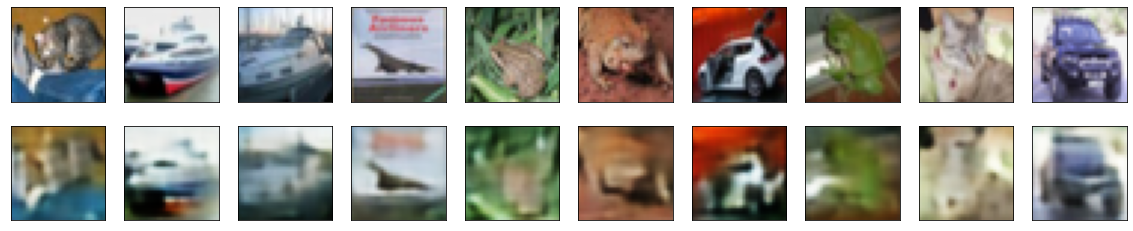

In [15]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(32,32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32,32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()